Each training and test example is assigned to one of the following labels:

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
train = pd.read_csv('fashion-mnist_train.csv')

In [4]:
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X_train = train.drop(['label'],axis=1)

In [6]:
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y_train = train['label']

In [8]:
y_train

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

In [9]:
test = pd.read_csv('fashion-mnist_test.csv')

In [10]:
X_test = test.drop(['label'],axis=1)
y_test = test['label']

In [11]:
X_test.shape, y_test.shape

((10000, 784), (10000,))

In [12]:
X_train.shape,y_train.shape

((60000, 784), (60000,))

In [13]:
#Reshaping the data to 2D to visualize and run alongwith the CNN model:

X_train = X_train.values.reshape(60000,28,28)

In [14]:
X_test = X_test.values.reshape(10000,28,28)

In [15]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [16]:
import keras

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

Using TensorFlow backend.


Label code of the cloth: 7


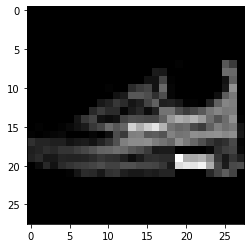

In [25]:
#Viewing the photos to see if we have correct data or not:

import matplotlib.pyplot as plt
import numpy as np
# sample 2D array
print("Label code of the cloth:", train['label'][244])
plt.imshow(X_train[244], cmap="gray")
plt.show()

In [26]:
#Let us use the loop in order to print multiple images and the labels alongwith
# 0 T-shirt/top 1 Trouser 2 Pullover 3 Dress 4 Coat 5 Sandal 6 Shirt 7 Sneaker 8 Bag 9 Ankle boot

a = list(range(2500,2550))
def show_cloth(num):
    #Print the category of cloth:
    print("label of cloth: ", train['label'][num])
    print("type of cloth is: ") 
    if train['label'][num]==0:
        print("T-shirt")
    elif train['label'][num]==1:
        print("Trouser")
    elif train['label'][num]==2:
        print("Pullover")
    elif train['label'][num]==3:
        print("Dress")
    elif train['label'][num]==4:
        print("Coat")  
    elif train['label'][num]==5:
        print("Sandal")
    elif train['label'][num]==6:
        print("Shirt")
    elif train['label'][num]==7:
        print("Sneaker")
    elif train['label'][num]==8:
        print("Bag")
    else:
        print("Angle boot")
    plt.imshow(X_train[num],cmap="gray")
    plt.show()

label of cloth:  9
type of cloth is: 
Angle boot


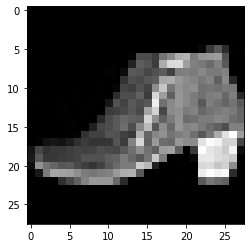

label of cloth:  5
type of cloth is: 
Sandal


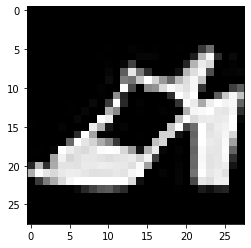

label of cloth:  3
type of cloth is: 
Dress


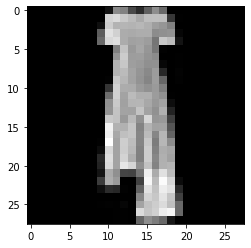

label of cloth:  8
type of cloth is: 
Bag


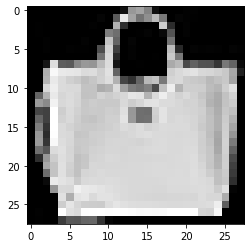

label of cloth:  3
type of cloth is: 
Dress


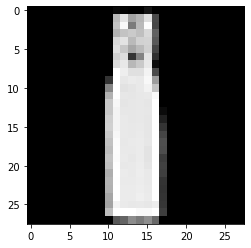

label of cloth:  1
type of cloth is: 
Trouser


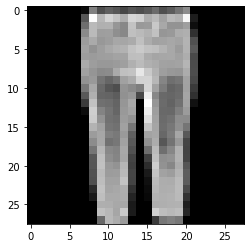

label of cloth:  1
type of cloth is: 
Trouser


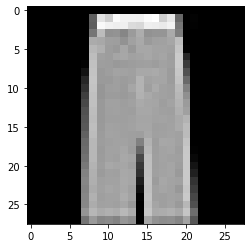

label of cloth:  7
type of cloth is: 
Sneaker


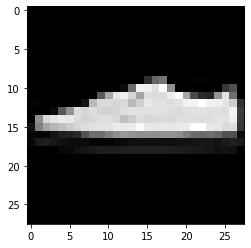

label of cloth:  4
type of cloth is: 
Coat


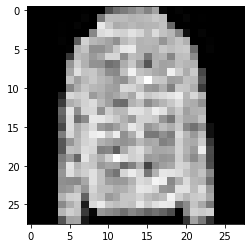

label of cloth:  8
type of cloth is: 
Bag


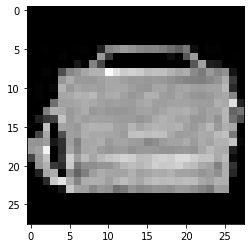

label of cloth:  1
type of cloth is: 
Trouser


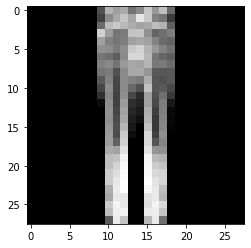

label of cloth:  6
type of cloth is: 
Shirt


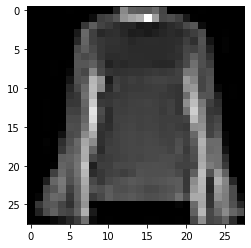

label of cloth:  0
type of cloth is: 
T-shirt


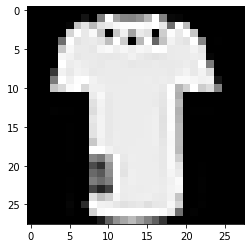

label of cloth:  0
type of cloth is: 
T-shirt


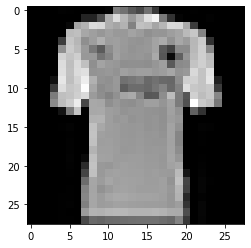

label of cloth:  6
type of cloth is: 
Shirt


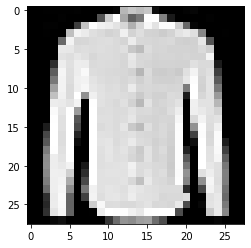

label of cloth:  4
type of cloth is: 
Coat


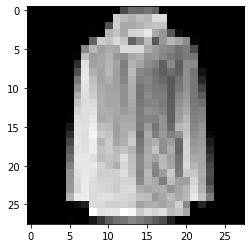

label of cloth:  0
type of cloth is: 
T-shirt


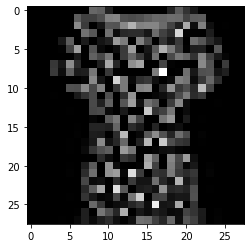

label of cloth:  9
type of cloth is: 
Angle boot


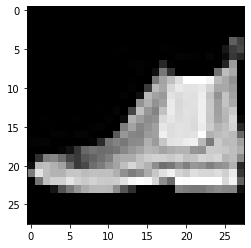

label of cloth:  7
type of cloth is: 
Sneaker


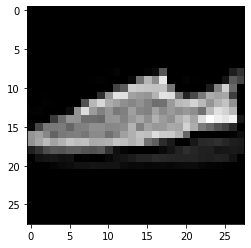

label of cloth:  2
type of cloth is: 
Pullover


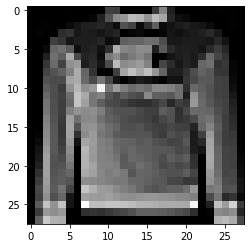

label of cloth:  0
type of cloth is: 
T-shirt


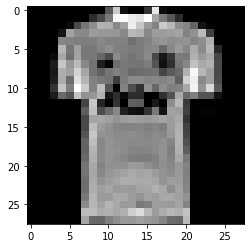

label of cloth:  6
type of cloth is: 
Shirt


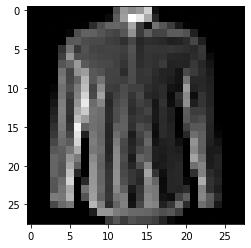

label of cloth:  7
type of cloth is: 
Sneaker


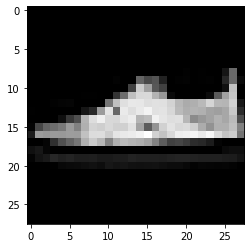

label of cloth:  0
type of cloth is: 
T-shirt


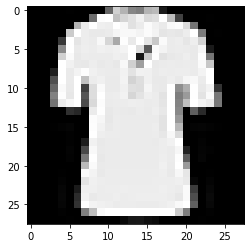

label of cloth:  4
type of cloth is: 
Coat


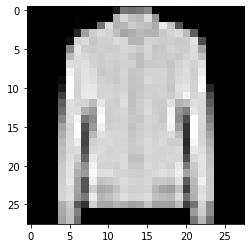

label of cloth:  9
type of cloth is: 
Angle boot


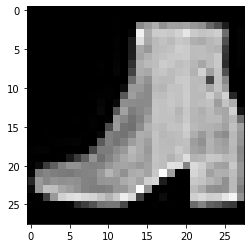

label of cloth:  4
type of cloth is: 
Coat


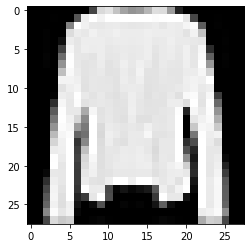

label of cloth:  1
type of cloth is: 
Trouser


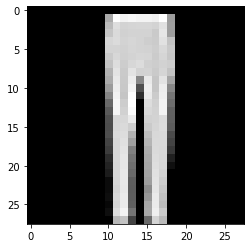

label of cloth:  6
type of cloth is: 
Shirt


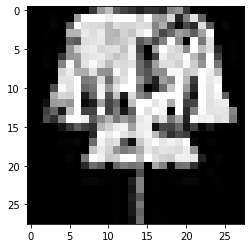

label of cloth:  1
type of cloth is: 
Trouser


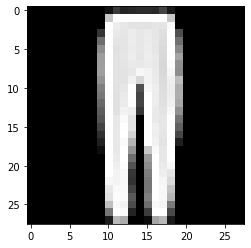

label of cloth:  4
type of cloth is: 
Coat


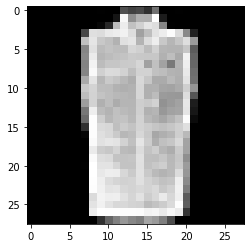

label of cloth:  9
type of cloth is: 
Angle boot


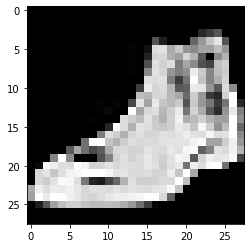

label of cloth:  2
type of cloth is: 
Pullover


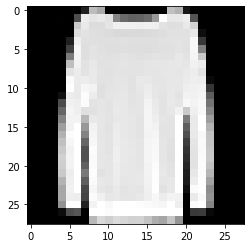

label of cloth:  7
type of cloth is: 
Sneaker


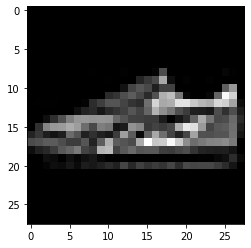

label of cloth:  5
type of cloth is: 
Sandal


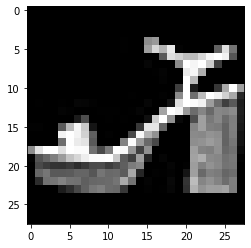

label of cloth:  0
type of cloth is: 
T-shirt


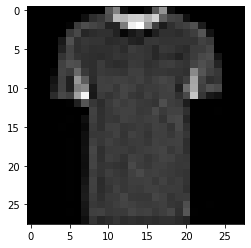

label of cloth:  0
type of cloth is: 
T-shirt


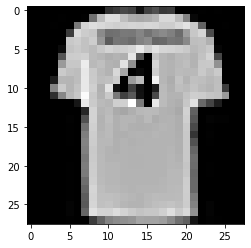

label of cloth:  9
type of cloth is: 
Angle boot


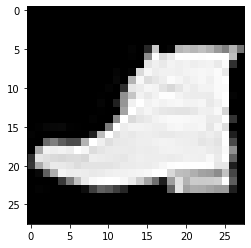

label of cloth:  5
type of cloth is: 
Sandal


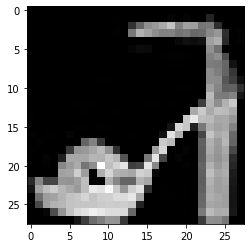

label of cloth:  7
type of cloth is: 
Sneaker


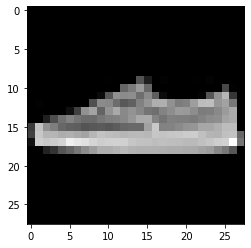

label of cloth:  3
type of cloth is: 
Dress


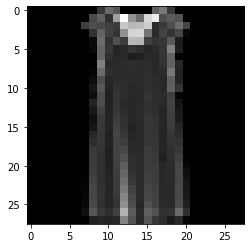

label of cloth:  9
type of cloth is: 
Angle boot


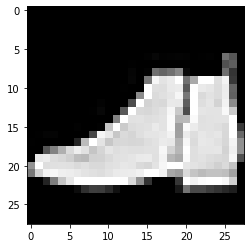

label of cloth:  9
type of cloth is: 
Angle boot


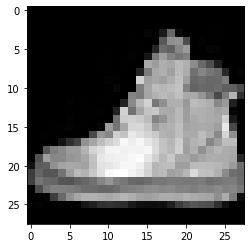

label of cloth:  8
type of cloth is: 
Bag


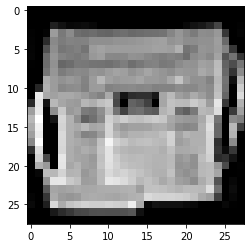

label of cloth:  8
type of cloth is: 
Bag


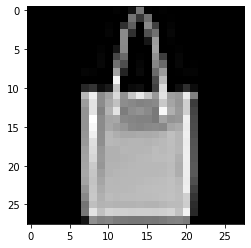

label of cloth:  8
type of cloth is: 
Bag


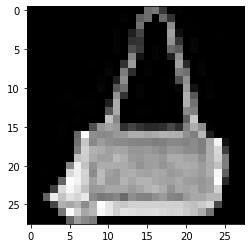

label of cloth:  2
type of cloth is: 
Pullover


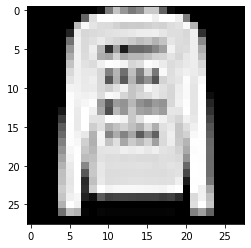

label of cloth:  7
type of cloth is: 
Sneaker


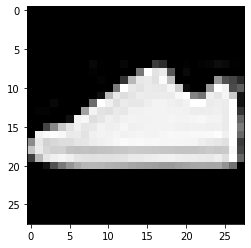

label of cloth:  2
type of cloth is: 
Pullover


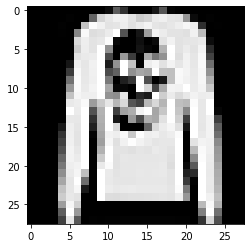

label of cloth:  0
type of cloth is: 
T-shirt


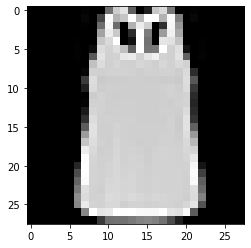

In [19]:
for i in a:
    show_cloth(i)

In [20]:
X_train[122].shape

(28, 28)

In [21]:
input_shape = X_train[0].shape

In [22]:
#Let us now build the model:

from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import RMSprop

In [23]:
x_train=X_train.reshape(60000,28, 28,1)
x_test=X_test.reshape(10000,28, 28,1)

In [28]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=x_train[1].shape))
# 64 3x3 kernels
model.add(Conv2D(64, (3, 3), activation='relu'))
# Reduce by taking the max of each 2x2 block
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout to avoid overfitting
model.add(Dropout(0.25))
# Flatten the results to one dimension for passing into our final layer
model.add(Flatten())
# A hidden layer to learn with
model.add(Dense(128, activation='relu'))
# Another dropout
model.add(Dropout(0.5))
# Final categorization from 0-9 with softmax
model.add(Dense(10, activation='softmax'))

In [29]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [31]:
# we use less epochs (=10) because we don't want to spend too much time to run the model.
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=10,
                    verbose=2,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 208s - loss: 0.4770 - accuracy: 0.8285 - val_loss: 0.2938 - val_accuracy: 0.8944
Epoch 2/10
 - 203s - loss: 0.3184 - accuracy: 0.8845 - val_loss: 0.2471 - val_accuracy: 0.9074
Epoch 3/10
 - 213s - loss: 0.2752 - accuracy: 0.9003 - val_loss: 0.2239 - val_accuracy: 0.9184
Epoch 4/10
 - 198s - loss: 0.2427 - accuracy: 0.9114 - val_loss: 0.2126 - val_accuracy: 0.9199
Epoch 5/10
 - 203s - loss: 0.2189 - accuracy: 0.9202 - val_loss: 0.2048 - val_accuracy: 0.9243
Epoch 6/10
 - 201s - loss: 0.1967 - accuracy: 0.9272 - val_loss: 0.2157 - val_accuracy: 0.9244
Epoch 7/10
 - 203s - loss: 0.1854 - accuracy: 0.9317 - val_loss: 0.2049 - val_accuracy: 0.9268
Epoch 8/10
 - 206s - loss: 0.1697 - accuracy: 0.9369 - val_loss: 0.1924 - val_accuracy: 0.9298
Epoch 9/10
 - 204s - loss: 0.1604 - accuracy: 0.9414 - val_loss: 0.1922 - val_accuracy: 0.9346
Epoch 10/10
 - 200s - loss: 0.1483 - accuracy: 0.9447 - val_loss: 0.2005 - val_accuracy: 0.9310

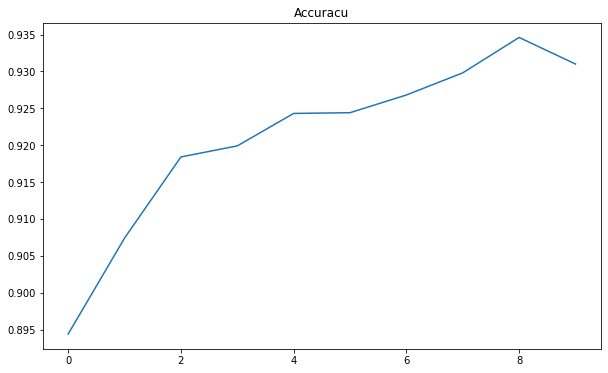

In [32]:
plt.figure(figsize=(10,6))
plt.title('Accuracu')
plt.plot(history.history['val_accuracy'])

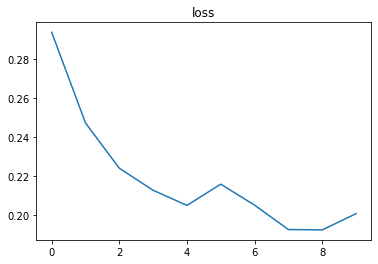

In [33]:
plt.title('loss')
plt.plot(history.history['val_loss'])